In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Dataset.csv to Dataset.csv


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('Dataset.csv')

print("dataset previev --------")
print(df.head())

dataset previev --------
   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       0   63        1               1        1              1   
1       0   58        1               1        1              1   
2       0   59        1               1        1              2   
3       1   46        1               2        2              1   
4       1   63        2               1        1              2   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                2         2         1         1                  1         1   
1                1         2         1         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  1         1   
4                1         1         1         1                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0           

In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 2457 non-null   int64
 1   AGE                    2457 non-null   int64
 2   SMOKING                2457 non-null   int64
 3   YELLOW_FINGERS         2457 non-null   int64
 4   ANXIETY                2457 non-null   int64
 5   PEER_PRESSURE          2457 non-null   int64
 6   CHRONIC DISEASE        2457 non-null   int64
 7   FATIGUE                2457 non-null   int64
 8   ALLERGY                2457 non-null   int64
 9   WHEEZING               2457 non-null   int64
 10  ALCOHOL CONSUMING      2457 non-null   int64
 11  COUGHING               2457 non-null   int64
 12  SHORTNESS OF BREATH    2457 non-null   int64
 13  SWALLOWING DIFFICULTY  2457 non-null   int64
 14  CHEST PAIN             2457 non-null   int64
 15  LUNG_CANCER            2457 non-null  

In [ ]:
#describe
print(df.describe())

            GENDER          AGE      SMOKING  YELLOW_FINGERS      ANXIETY  \
count  2457.000000  2457.000000  2457.000000     2457.000000  2457.000000   
mean      0.328449    61.037037     1.405779        1.313390     1.288563   
std       0.469745     8.788865     0.491142        0.463966     0.453187   
min       0.000000    21.000000     1.000000        1.000000     1.000000   
25%       0.000000    57.000000     1.000000        1.000000     1.000000   
50%       0.000000    61.000000     1.000000        1.000000     1.000000   
75%       1.000000    67.000000     2.000000        2.000000     2.000000   
max       1.000000    81.000000     2.000000        2.000000     2.000000   

       PEER_PRESSURE  CHRONIC DISEASE     FATIGUE      ALLERGY      WHEEZING  \
count    2457.000000      2457.000000  2457.000000  2457.000000  2457.000000   
mean        1.266178         1.306878     1.563696     1.273097     1.278388   
std         0.442049         0.461292     0.496027     0.445641   

In [ ]:
#data separation
from sklearn.model_selection import train_test_split
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 1965 samples
Testing set size: 492 samples


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize the Random Forest Model
# n_estimators=100 means we are using 100 individual decision trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train the model (The "Learning" Step)
rf_model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Use the model to make predictions on the test data
y_pred = rf_model.predict(X_test)

# 2. Compare predictions to the actual results
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# 3. Detailed breakdown (Precision, Recall, F1-Score)
print("\n--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred))

Model Accuracy: 100.00%

--- Detailed Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       295
           1       1.00      1.00      1.00       197

    accuracy                           1.00       492
   macro avg       1.00      1.00      1.00       492
weighted avg       1.00      1.00      1.00       492



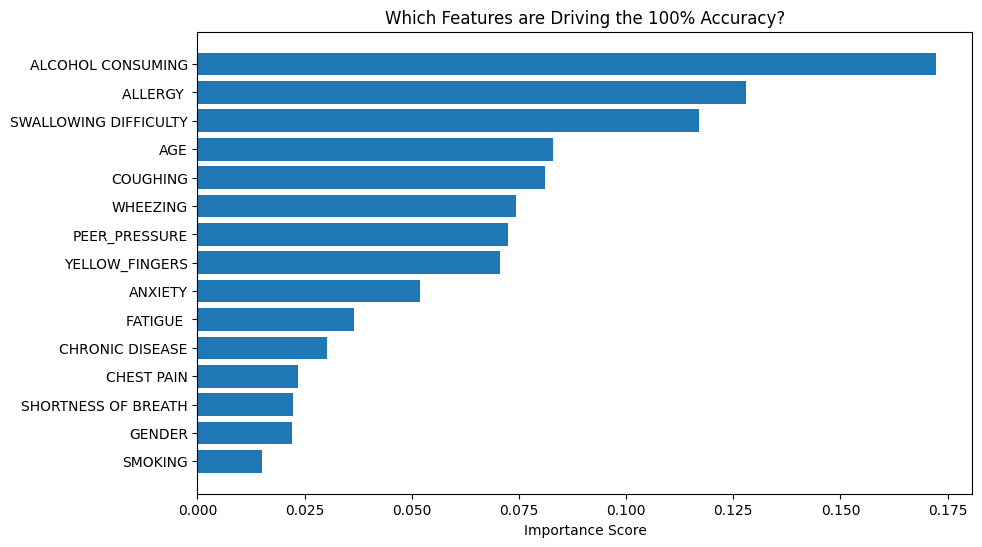

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Which Features are Driving the 100% Accuracy?')
plt.xlabel('Importance Score')
plt.show()

Showing explanation for patient 0 (Target: Lung Cancer):


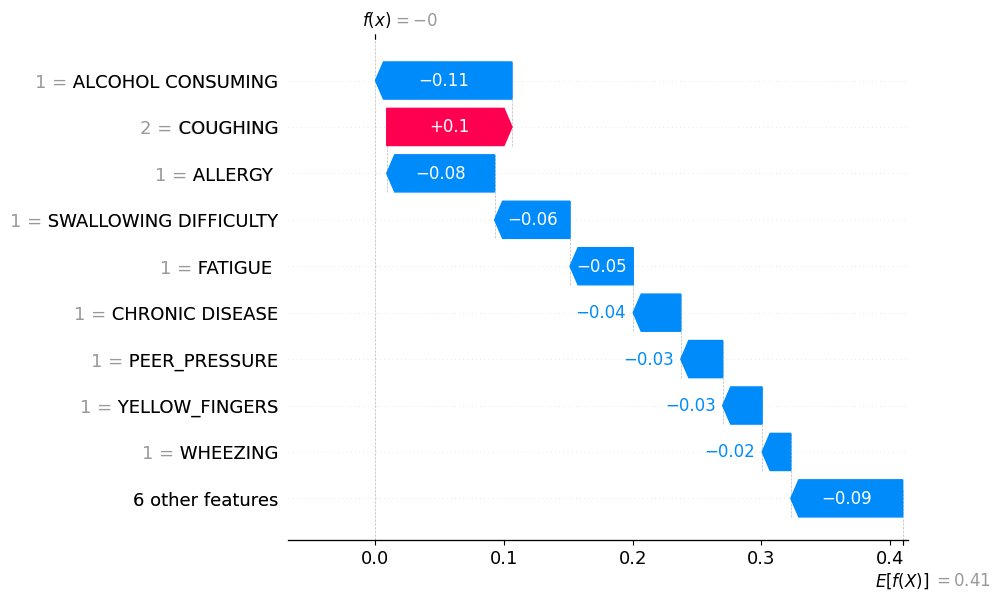

In [ ]:
!pip install shap
import shap
import matplotlib.pyplot as plt


# 1. Re-initialize the explainer if needed
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X_test)

# 2. FIX: Slice the Explanation object for the positive class (class 1)
# This ensures base_values becomes a single scalar that the plot can handle
lung_cancer_class_index = 1
patient_index = 0

# Extracting the specific slice: [patient, feature, class]
single_explanation = shap_values[patient_index, :, lung_cancer_class_index]

print(f"Showing explanation for patient {patient_index} (Target: Lung Cancer):")
shap.plots.waterfall(single_explanation)

In [ ]:
# HIGH RISK PATIENT: Changing some 1s to 2s and increasing Age
# High Alcohol (2), Swallowing Difficulty (2), Coughing (2), Older Age (72)
high_risk_patient = [[1, 72, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1]]

# Convert to DataFrame to remove the UserWarning
high_risk_df = pd.DataFrame(high_risk_patient, columns=X.columns)

prediction_hr = rf_model.predict(high_risk_df)
prob_hr = rf_model.predict_proba(high_risk_df)

print(f"--- Results for High Risk Patient ---")
result_hr = "Lung Cancer" if prediction_hr[0] == 1 else "No Lung Cancer"
print(f"Prediction: {result_hr}")
print(f"Confidence: {prob_hr[0][prediction_hr[0]]*100:.2f}%")

--- Results for High Risk Patient ---
Prediction: Lung Cancer
Confidence: 98.00%


In [ ]:
import joblib

# Save the model to a file
joblib.dump(rf_model, 'lung_cancer_model.pkl')

['lung_cancer_model.pkl']

In [ ]:
from google.colab import files
files.download('lung_cancer_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>